                                             University of Victoria
                                           
                                         Department of Computer Science
                                           
                                             CSC 587D : Data Mining
                                               
                                     Project :- Influencers in Social Network
                                    
                                           
                                      Submitted by :- Gaganjot Kaur 
                                                      Xi Sun
                                                      Chang Gong                                                 
  

In [1]:
# Import the neccesary libraries and set a seed. 
from IPython.display import Image
from IPython.core.display import HTML 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline
np.random.seed(22)

<a id='InfluencersinSocialNetworks'></a>
<h1> <center> Influencers in Social Networks </h1> </center> 



### [1 Motivation](#Motivation)

### [2 Data Description](#DataDescription)

#### [2.1 Read Data](#ReadData)

#### [2.2 Dataset Description](#DatasetDescription)

#### [2.3 Data Distribution](#DataDistribution)

#### [2.4 Class Analysis](#ClassAnalysis)

#### [2.5 Finding Missing Values and Abnormal Data in Dataset](#FindingMissing)

#### [2.6 Feature Selection](#FeatureSelection)

### [3 Training Models](#TrainingModels)

#### [3.1 Split Data](#SplitData)

#### [3.2 Training Model Function](#TrainingModelFunction)

#### [3.3 Random Forest Classifier](#RandomForestClassifier)

#### [3.4 Decision Tree Classifier](#DecisionTreeClassifier)

#### [3.5 Logistic Regression](#LogisticRegression)

#### [3.6 Naive Bayes Classifier](#NaiveBayesClassifier)

#### [3.7 Assembly methods](#Assemblymethods)

#### [3.7 Assembly methods](#Assemblymethods)

##### [3.7.1 Voting Classifier](#VotingClassifier)

##### [3.7.2 Stacking Classifier](#StackingClassifier)

### [4 Evaluation and Comparison](#EvaluationandComparison)

<a id='Motivation'></a>
# 1 Motivation

Social Networking sites have become such a crucial part of life that its difficult to imagine life without them. People have grown so addicted to them that they spend more than half of their day on facebook and instagram. The only reason its so popular and addictive is, it being the means of instant validation and gratification. People upload their pictures and details about personal lives and get instant likes and comments in form of validation which makes them feel good and encourages them to continue their participation. This addiction of instant pleasure and appreciation increases so much that their lives start to revolve around building their social networking profiles as attractive as they can to make their imperfect life appear happy and perfect which is obviously not. As a result, this pressurizes them to play fake and live in an illusionary world.  

But on the other hand, It also has number of advantages if it is used just for having fun and not as means of addiction:-
1.It helps different people sitting in the different parts of world to give voice to their opinions and display their talents      and skills.
2.It is a goood means for introvert and lonely people to interact and express their heart out and make friends.
3.It is a good source of entertainment and having a quick break while feeling pressurized.
and lots more..

For the whole society, the social network closely connects people and makes them more closely connected and maximizes the utilization of social information resources. At the same time, information can be expanded and disseminated in the greatest sense through social networks, and it is more open and transparent, which is conducive to the democratic construction and fairness and openness of the whole society. However, due to the current unsound system, incomplete laws and regulations, lack of supervision and other factors, the social network may also lead to the disclosure of personal information and become the distribution center of rumors. Moreover, as more and more people become addicted to social networks, the whole society will also be trapped in the awkward situation where everyone is a friend on the Internet and the feelings are indifferent and communication is not smooth in reality. So it's important to analyze who's more vulnerable to social networks .If we can figure out which groups of people are likely to be affected, we can make specific precautions, such as pop out anti-addiction alerts, changes the display content to guide customer’s interest and habit. This is why we choose such kind of data to conduct data mining project, and we try to figure out the factors that affect people by social networks.





<a id='DataDescription'></a>
# 2 Data Description

The data we selected is from a Hackathon in Kaggle.

Data Science London and the UK Windows Azure Users Group in partnership with Microsoft and Peerindex prepared to study a set of data which is used to predict human judgements about who is more influential on social media.

The dataset, provided by Peerindex, comprises a standard, pair-wise preference learning task. Each datapoint describes two individuals, A and B. For each person, 11 pre-computed, non-negative numeric features based on twitter activity (such as volume of interactions, number of followers, etc) are provided. The goal of the challenge is to train a machine learning model which, for pairs of individuals, predicts the human judgement on who is more influential with high accuracy. Labels for the dataset have been collected by PeerIndex using [an application similar to the one described in this post](https://www.brandwatch.com/p/peerindex-and-brandwatch/?utm_source=peerindex&utm_medium=lp_redirect).

This is a standard Kaggle dataset. Hence, we do not have class labels in the test set. Kaggle uses AUC value as the evaluation metric which will be displayed after every submission. Model accuracy was measured using cross-validation techniques on train set. Each classifier’s prediction accuracy on test set has been evaluated with the help of Kaggle’s AUC metric. 

We regard this project as a competition of Kaggle and follow the requirements and judgement of Kaggle.

This is the basic process of a Kaggle match, and we have to implement these modules, which we will analyze in detail later.

First we will analyze the data in more detail.

<h1> <center> Data Analysis </h1> </center> 

<a id='ReadData'></a>
## 2.1 Read Data

Pandas can convert the tabulated data (The file is not necessarily a table) to a DataFrame data structure. Then, we can analyze data, preprocess data, and operate rows and columns by manipulating the DataFrame.

First we call the interface pandas.read_csv () to read the data from the train.csv file and list the printouts for a visual look at the attributes.

In [13]:
data = pd.read_csv("./train.csv")
data.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


We can intuitively analyze the following conclusions:
 
• The dataset has 22 features

     1.Each data point represents two users ‘A’ and ‘B’ 
     2.Both have 11 similar features 

• This is a classic binary classification problem 

    1.Predicting human judgement on who is more influential ‘A’ or ‘B’. 
    2.The 0th column of the data is the class tag: the class tag is 1, which means that A is more influential than B, and 0 means that B is more influential than A  
    3.The feature vector is 11 preprocessed non-negative numeric data obtained from twitter. Columns 1 to 11 are features of A and 12 to 22 are features of B.


<a id='DatasetDescription'></a>
### 2.2 Dataset Description

Due to the large amount of data, the number of training instances can usually reach thousand to million level. Therefore, one more thing that you might need to know is some basic statistics on your data such as average value of the data, the distribution, the skew of the data, etc... 

Pandas makes this delightfully simple. The describe() function will return a table of various statistics such as count, mean, standard deviation and more that will see as following:

In [14]:
# Statistical description of each variable. 

round(data.describe())

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,...,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0
mean,1.0,649884.0,12659.0,5952.0,2666.0,1032.0,6.0,1.0,9.0,5268.0,...,12738.0,5903.0,2555.0,997.0,6.0,1.0,10.0,5255.0,85.0,3745.0
std,0.0,2028787.0,49009.0,17339.0,29165.0,10955.0,10.0,2.0,18.0,28947.0,...,50055.0,16298.0,25089.0,9342.0,10.0,2.0,19.0,26779.0,107.0,5518.0
min,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,2664.0,322.0,85.0,3.0,1.0,0.0,0.0,1.0,12.0,...,322.0,75.0,3.0,1.0,0.0,0.0,1.0,11.0,15.0,1206.0
50%,1.0,45589.0,778.0,932.0,49.0,14.0,2.0,0.0,4.0,195.0,...,773.0,890.0,49.0,14.0,2.0,0.0,3.0,190.0,55.0,2206.0
75%,1.0,392738.0,2838.0,6734.0,350.0,119.0,7.0,1.0,11.0,1323.0,...,2838.0,6734.0,374.0,107.0,7.0,1.0,11.0,1323.0,112.0,4350.0
max,1.0,36543194.0,1165830.0,549144.0,1145219.0,435826.0,77.0,16.0,193.0,920838.0,...,664324.0,549144.0,1145219.0,435826.0,77.0,16.0,193.0,920838.0,1862.0,75526.0


In [15]:
testdata = pd.read_csv("./test.csv")
round(testdata.describe())

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5952.0,5952.0,5952.0,5952.0,5952.0,5952.0,5952.0,5952.0,5952.0,5952.0,...,5952.0,5952.0,5952.0,5952.0,5952.0,5952.0,5952.0,5952.0,5952.0,5952.0
mean,708766.0,15817.0,6231.0,2610.0,999.0,6.0,1.0,10.0,5170.0,84.0,...,14841.0,6117.0,2607.0,1011.0,6.0,1.0,9.0,5385.0,88.0,4104.0
std,2085302.0,57157.0,17367.0,28252.0,10586.0,11.0,2.0,20.0,28305.0,98.0,...,56158.0,16341.0,24620.0,9170.0,10.0,2.0,18.0,27497.0,146.0,8043.0
min,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3741.0,337.0,103.0,4.0,1.0,0.0,0.0,1.0,15.0,18.0,...,331.0,103.0,4.0,1.0,0.0,0.0,1.0,15.0,18.0,1231.0
50%,54453.0,904.0,1062.0,55.0,14.0,2.0,0.0,3.0,206.0,55.0,...,900.0,930.0,48.0,13.0,2.0,0.0,3.0,188.0,58.0,2381.0
75%,488553.0,3256.0,6820.0,388.0,129.0,7.0,1.0,11.0,1637.0,117.0,...,3115.0,6734.0,374.0,107.0,7.0,1.0,11.0,1323.0,120.0,4545.0
max,36543194.0,550744.0,549144.0,1145219.0,435826.0,97.0,27.0,193.0,920838.0,1171.0,...,664324.0,549144.0,1145219.0,435826.0,97.0,27.0,193.0,920838.0,8112.0,464349.0




From the statistics, we can learn:

• Training set consists of 5500 data points 

• Test set contains 5952 rows 

• Through the analysis of the average value and standard variance, we find that the distribution of data is relatively extensive. For example, A_follow_count is an attribute, with a minimum value of 20, a maximum value of around 3.6 million, an average value of about 700k, and 75% of value is less than 50K. This indicates that there are relatively fewer data in the range of 50K to 3.6m, and it is likely to produce outliers and influence the final classification results.

At the same time, we can see that the distribution of test data is very similar to training data, so we also need to consider that if we do data cleaning and delete those extreme data, it may also have an impact on the classification of test data. Therefore, more detailed data analysis is required below.

In order to describe the distribution of data, the describe function above can not directly visualize the distribution in various features and in terms of binary class.

Python provides us with a awesome drawing tool matplotlib.pyplot. Wiht this tool, we can visualize the data very easily. We use the line graph to show "Mean of the attibutes" and "Stand deviation of the attibutes".

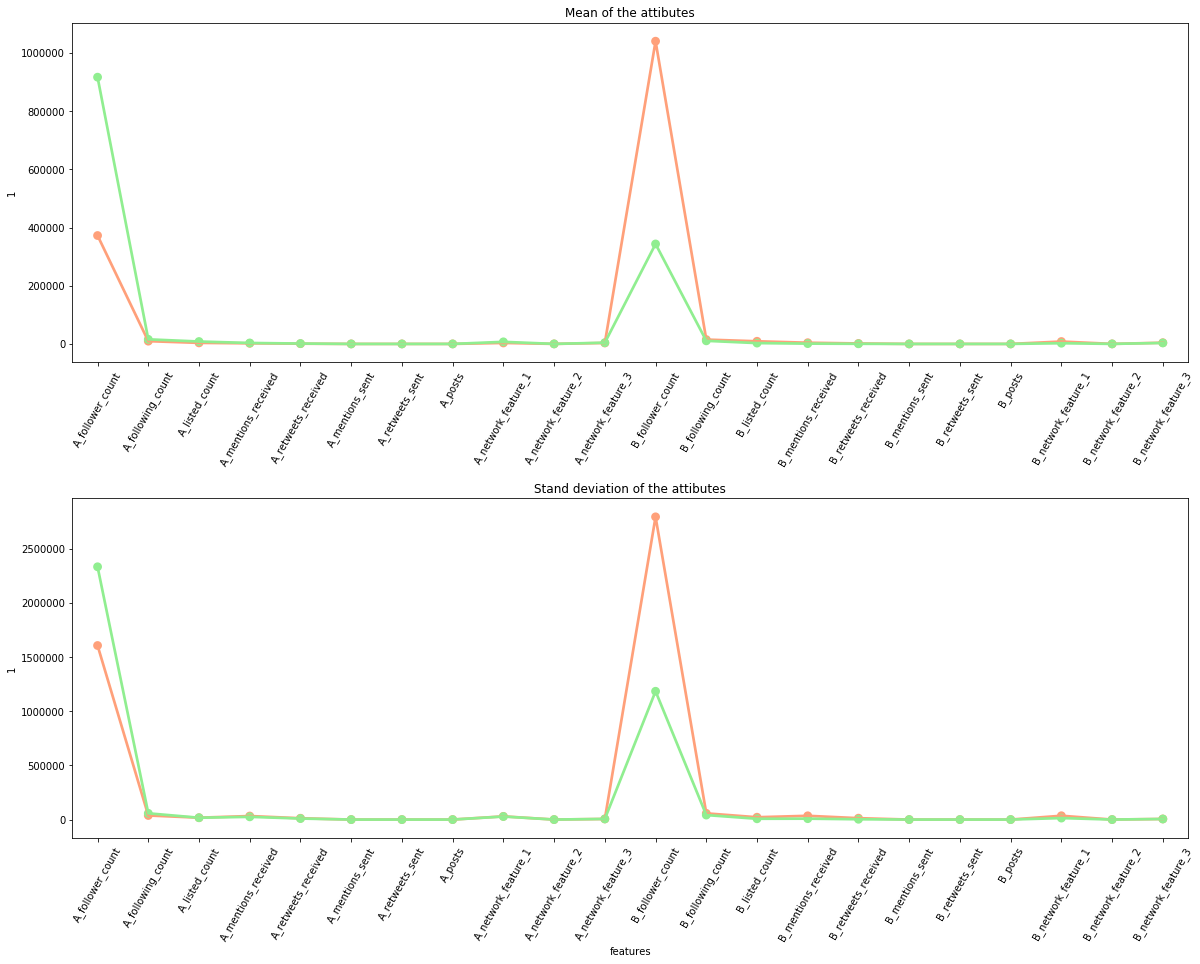

In [16]:
features_mean = data.groupby("Choice")[['A_follower_count', 'A_following_count', 'A_listed_count', 'A_mentions_received',
                                        'A_retweets_received', 'A_mentions_sent', 'A_retweets_sent',
                                        'A_posts','A_network_feature_1','A_network_feature_2','A_network_feature_3','B_follower_count','B_following_count','B_listed_count','B_mentions_received','B_retweets_received','B_mentions_sent','B_retweets_sent','B_posts','B_network_feature_1','B_network_feature_2','B_network_feature_3']].mean().reset_index()

features_mean = features_mean.drop("Choice",axis =1)

features_std = data.groupby("Choice")[['A_follower_count', 'A_following_count', 'A_listed_count', 'A_mentions_received',
                                        'A_retweets_received', 'A_mentions_sent', 'A_retweets_sent',
                                        'A_posts','A_network_feature_1','A_network_feature_2','A_network_feature_3','B_follower_count','B_following_count','B_listed_count','B_mentions_received','B_retweets_received','B_mentions_sent','B_retweets_sent','B_posts','B_network_feature_1','B_network_feature_2','B_network_feature_3']].std().reset_index()

features_std = features_std.drop("Choice",axis =1)

mean = features_mean.transpose().reset_index()
mean = mean.rename(columns={'index':"features", 0:"0", 1:"1"})
plt.figure(figsize=(20,15))
plt.subplot(211)
sns.pointplot(x= "features",y="0",data=mean,color="lightsalmon")
sns.pointplot(x= "features",y="1",data=mean,color="lightgreen")
plt.xticks(rotation =60)
plt.xlabel("")
plt.title("Mean of the attibutes")

std = features_std.transpose().reset_index()
std = std.rename(columns={'index':"features", 0:"0", 1:"1"})
plt.subplot(212)
sns.pointplot(x= "features",y="0",data=std,color="lightsalmon")
sns.pointplot(x= "features",y="1",data=std,color="lightgreen")
plt.xticks(rotation =60)
plt.title("Stand deviation of the attibutes")
plt.subplots_adjust(hspace =.4)

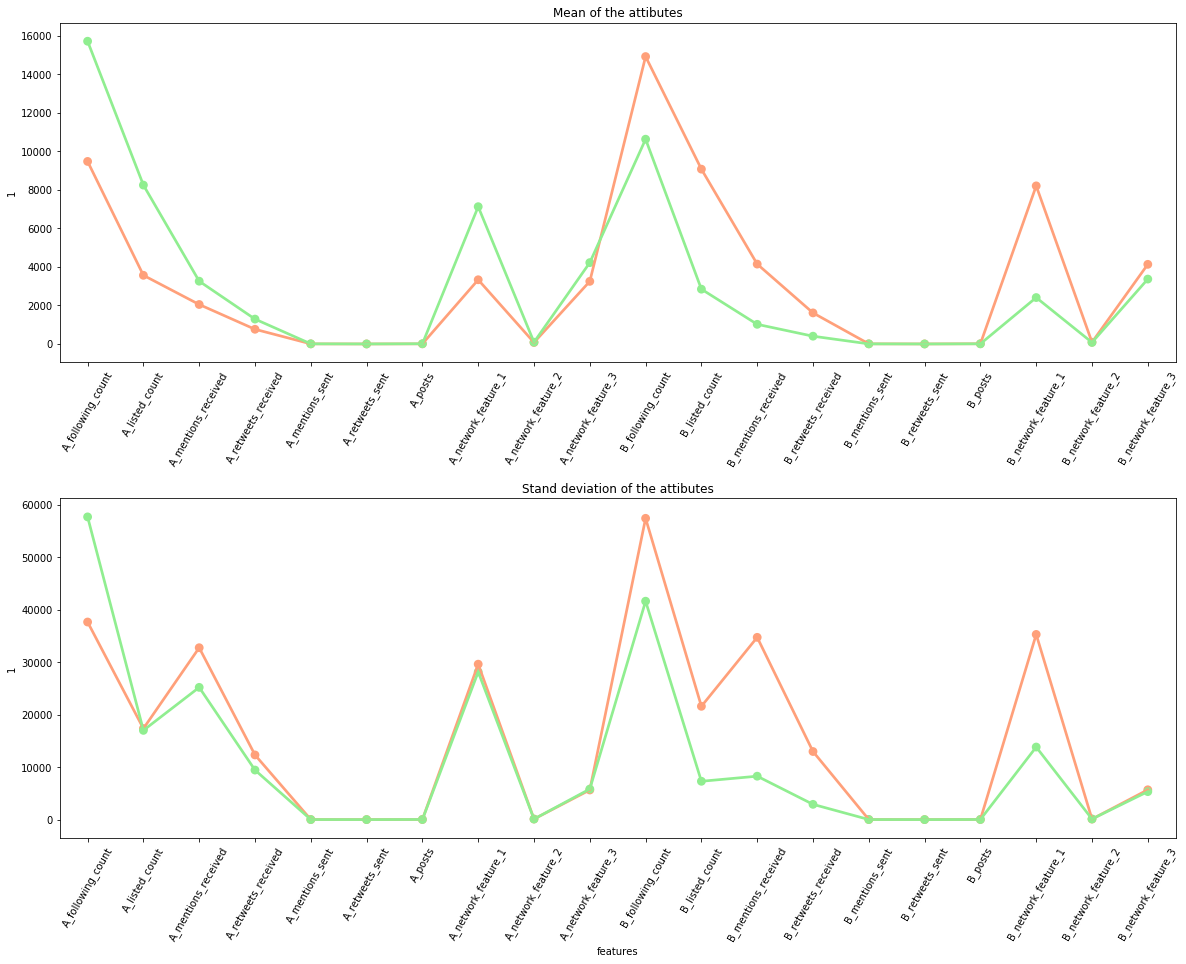

In [17]:
features_mean = features_mean.drop( ['A_follower_count','B_follower_count'],axis=1)

mean = features_mean.transpose().reset_index()
mean = mean.rename(columns={'index':"features", 0:"0", 1:"1"})
plt.figure(figsize=(20,15))
plt.subplot(211)
sns.pointplot(x= "features",y="0",data=mean,color="lightsalmon")
sns.pointplot(x= "features",y="1",data=mean,color="lightgreen")
plt.xticks(rotation =60)
plt.xlabel("")
plt.title("Mean of the attibutes")


features_std = features_std.drop( ['A_follower_count','B_follower_count'],axis=1)

std = features_std.transpose().reset_index()
std = std.rename(columns={'index':"features", 0:"0", 1:"1"})
plt.subplot(212)
sns.pointplot(x= "features",y="0",data=std,color="lightsalmon")
sns.pointplot(x= "features",y="1",data=std,color="lightgreen")
plt.xticks(rotation =60)
plt.title("Stand deviation of the attibutes")
plt.subplots_adjust(hspace =.4)

This linear distribution diagram gives us a better understanding of the data. The orange line represents the data for Class=0, and the green line represents the data for Class= 1.

We can see from the two figures above:

For user A, both the mean and STD of follower_count in term of Class=0 is lower than Class=1, on the opposite, The mean and STD of B_follower_count in terms of Class=0 is greater than Class=1. Follower counts for each user is far beyond the distribution space of other features.

As the follower_count value is very large, the relationship between other features in the first figure cannot be detected, so in the second figure, we dropped the values of A_follower_count and B_follower_count, so that the values of other features can scale to observe the distribution in terms of different classes. In general, we can see from the distribution diagram that what data need scaling or normalize, especially when applying regression algorithm, which will greatly shorten the iteration time.


<a id='DataDistribution'></a>
### 2.3 Data Distribution

The mean value and standard deviation of statistical data are far from enough in data analysis, we cannot know the distribution in each feature. We also need to introduce other histograms to analyze each feature more carefully to see if the feature is suitbable for training or should be dropped.
Here, we introduced python's advanced visual library Seaborn and used the distplot method to flexibly plot a univariate histogram and kernel density estimation graph which is generally used to analyze the distribution of numerical data.


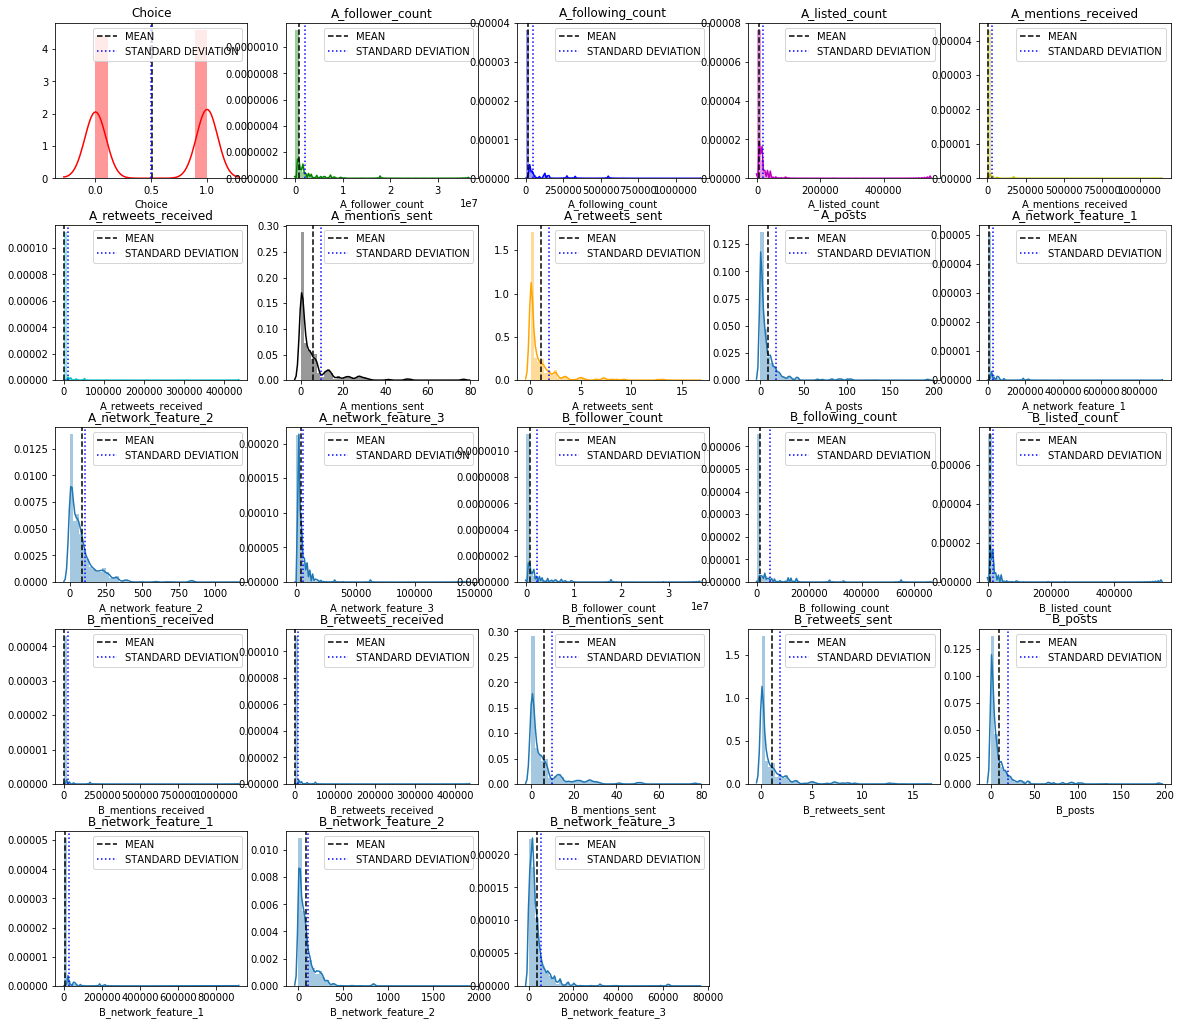

In [18]:
columns = ['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(20,40))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(data[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(data[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")




As can be seen from histgrams above, the distribution of these data is very similar, all of which are set on the left side of the graph, that is, the data is not standard normally distributed. A large number of data are concentrated in the interval of small value, and the extreme value data are relatively few. If you do a linear classification, the classifier will have less influence over these outliers. We can use more relaxed conditions to do the fitting, so we think the data availability is very high in terms of this project. Actually, the data has been pre-processed and preliminarily cleaned by Peerindex to make the data more effective for competition.


The above analysis is based on the individual feature, now we will have a further look at the cooralation between the variables.

A correlation map can show high correlation between each individuals. Here is function which can plot color-encoded matrix to show the correlation between each individuals in heatmap. The 
progressive color show the degree of coorelation. The daker the color is, the stronger relationship the two features have.

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'correlation between variable')

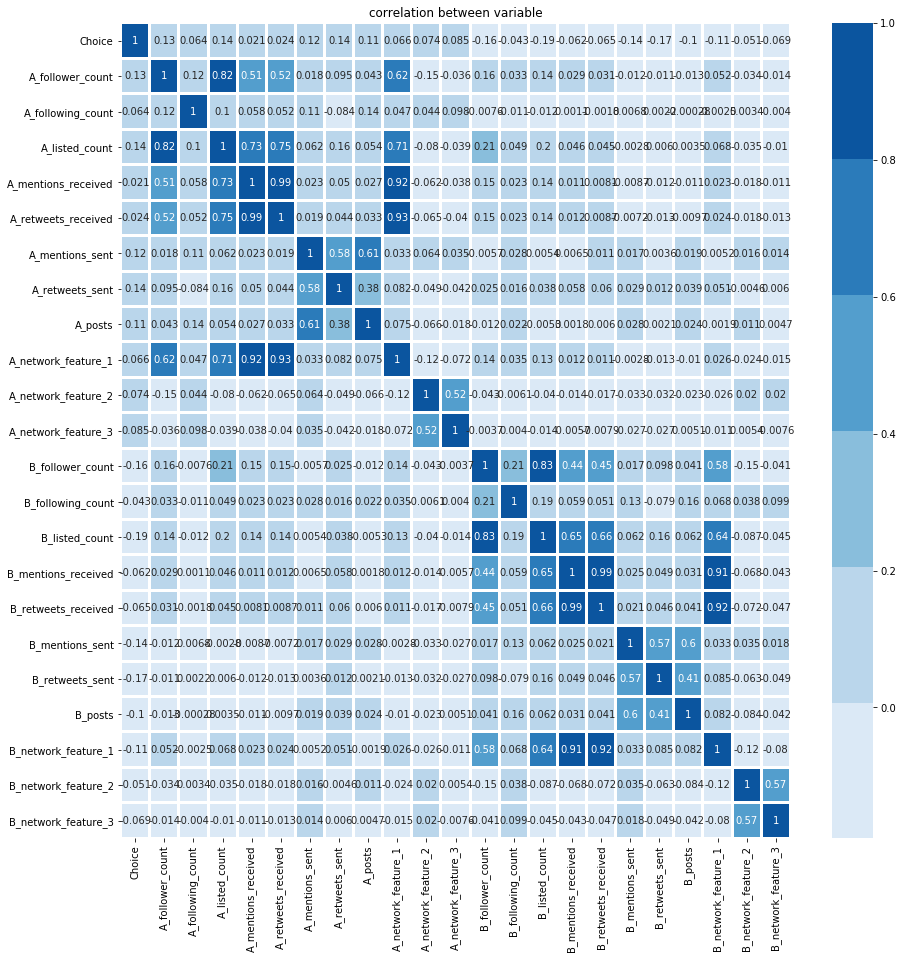

In [19]:
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 60)
correlation = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True,cmap=sns.color_palette("Blues"),linewidth=2,edgecolor="k")
plt.title("correlation between variable")

Only see the degree of corralation is often not enough, we should know more detail anout how the other data distribute in terms of one individual feature.

The pairplot function in Seaborn plots pairwise relationships in a dataset. This function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution and density of the data for the variable in that column. It is also possible to show a subset of variables or plot different variables on the rows and columns.


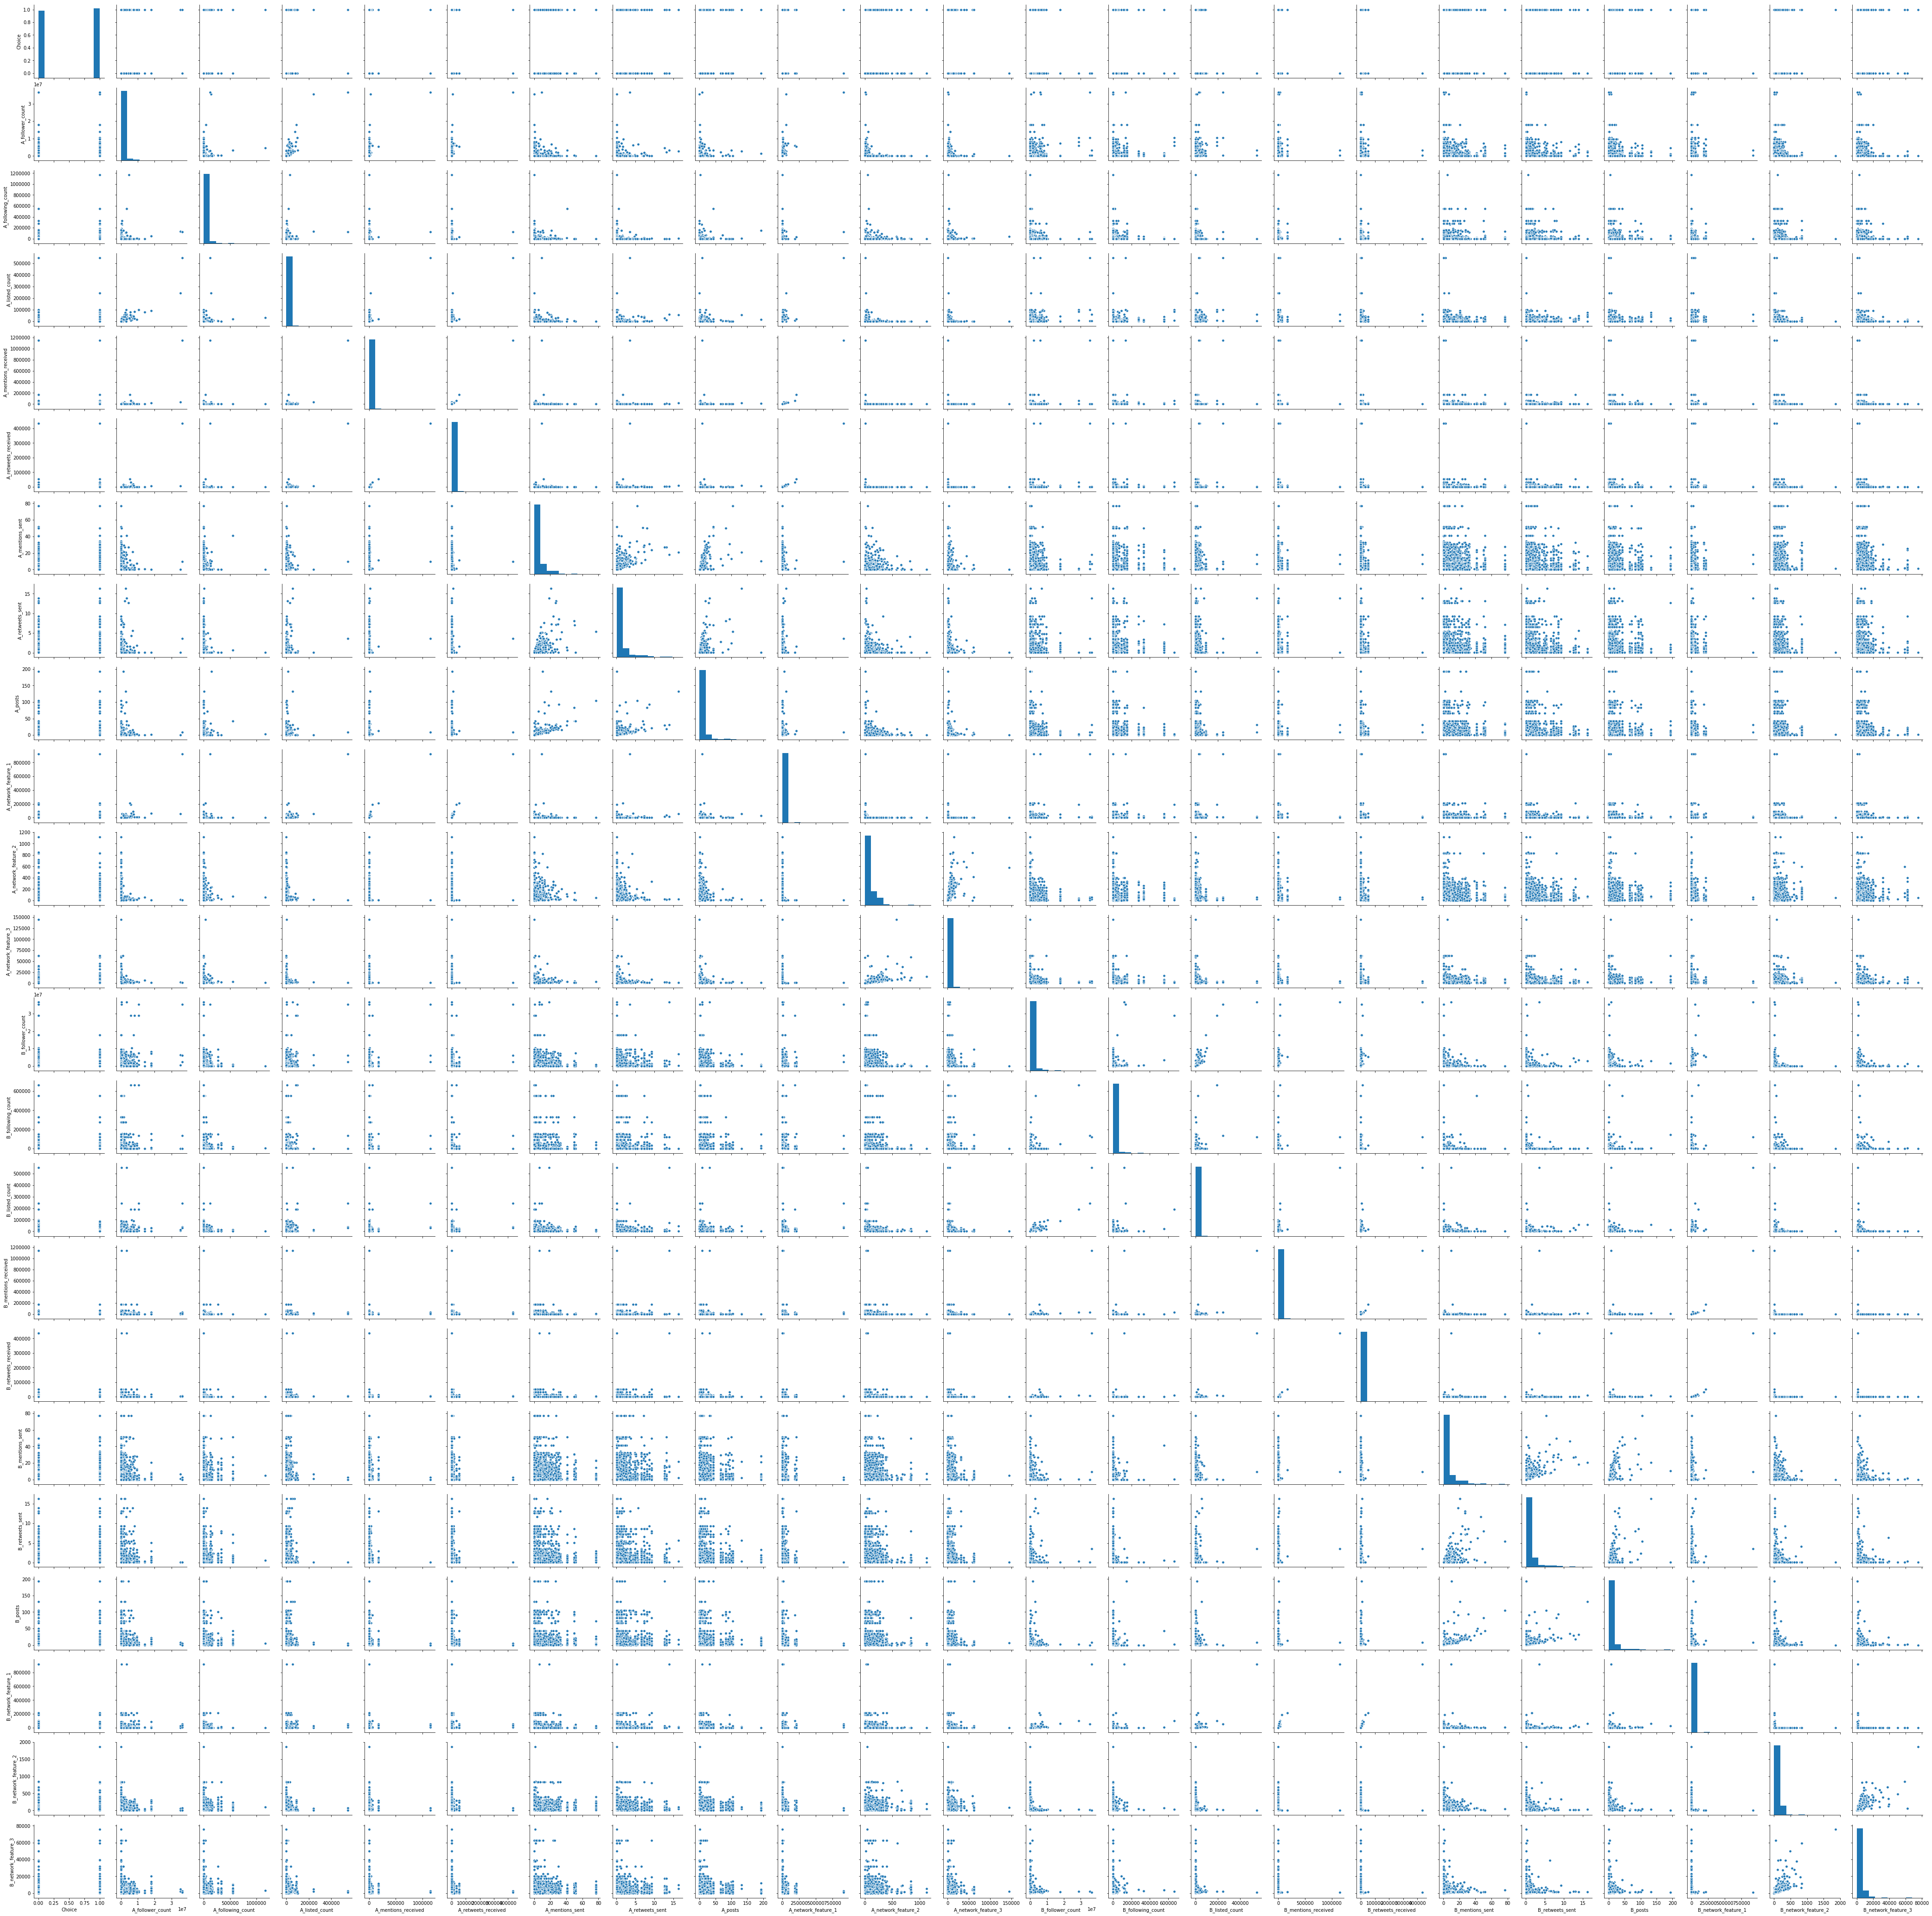

In [0]:
sns.pairplot(data,markers="h")
plt.show()

<a id='ClassAnalysis'></a>
### 2.4 Class Analysis

Features have been analyzed above, but lable has not yet. Generally, before training, we need to know whether the raw data is worth training, otherwise it wastes time and will reach the wrong result.

The first thing that needs to do is analyzing the distribution of lable of class. If the class is very unbalanced, we cannot get the appropriate and credibale classifier.

Text(0.5,1,'Count for target class in datset')

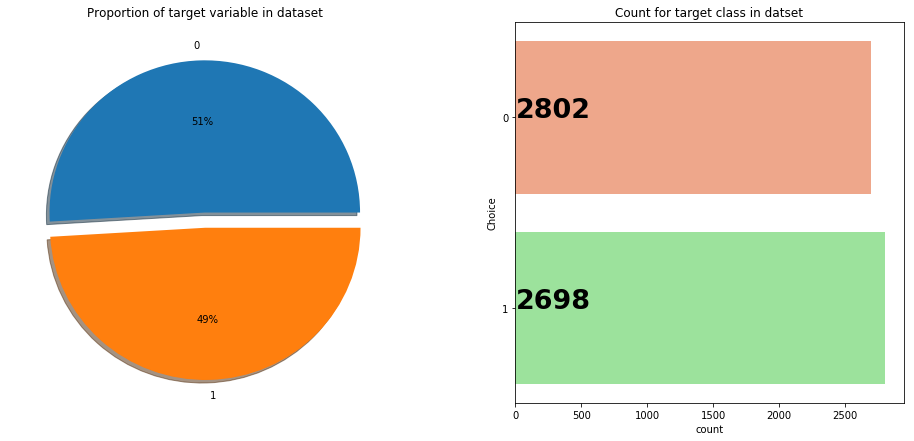

In [20]:
plt.figure(figsize=(16,7))

plt.subplot(121)
plt.pie(data["Choice"].value_counts().values,labels=["0","1"],autopct="%1.0f%%",shadow = True,explode=[0,.1])
plt.subplots_adjust(wspace = .3)
plt.title("Proportion of target variable in dataset")

plt.subplot(122)
ax = sns.countplot(y = data["Choice"],palette=["lightsalmon","lightgreen"])
for i,j in enumerate(data["Choice"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target class in datset")


 1 -> Person A is more influencer than person B.
 
 0 -> Person B is more influencer than person A.

We count all class to get 2,801 lable "0" verse 2,698 lable "1", the class Distribution is 48.83% (label 0) verse 51.16% (label 1), which means there is no class imbalance in train data. The training data is suitable for training. After, we will slpit the training data into training and testing set and count the class again to figure out proportion of target class in train dataset in order to prove the rationality of spliting.


<a id='FindingMissing'></a>
### 2.5 Finding Missing Values and Abnormal Data in Dataset

The inclusion of missing values in the data indicates that the data in our real world is confusing. Possible causes include human error during data entry, incorrect sensor readings and software bugs in data processing pipelines.

It's generally frustrating. The lack of data is probably the most common source of error in the code, and the reason most exceptions are handled. If we delete them, we might greatly reduce the amount of data available, and the data shortage in machine learning is the worst case.

However, in the absence of data points, there are usually hidden patterns. They can provide more information to help us solve the problem we're trying to solve.

Panadas.Dataframe.isnull() returns a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. 

In this output, we cannot find the NA value, that means all data is numerical and available for training.


In [21]:
print ("Missing values per variable: \n ",data.isnull().sum())

Missing values per variable: 
  Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64


Missingno also provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows us to get a quick visual summary of the completeness (or lack thereof) of the dataset.

The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

<img src="https://camo.githubusercontent.com/d59ba9e511fd42dd078b8c8829d3de3f6a7e1585/68747470733a2f2f692e696d6775722e636f6d2f675775584b45722e706e67" alt="Drawing" style="width: 600px;"/>

For example, at a glance, date, time, the distribution of injuries, and the contribution factor of the first vehicle appear to be completely populated, while geographic information seems mostly complete, but spottier.

The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.

Missing Value Map


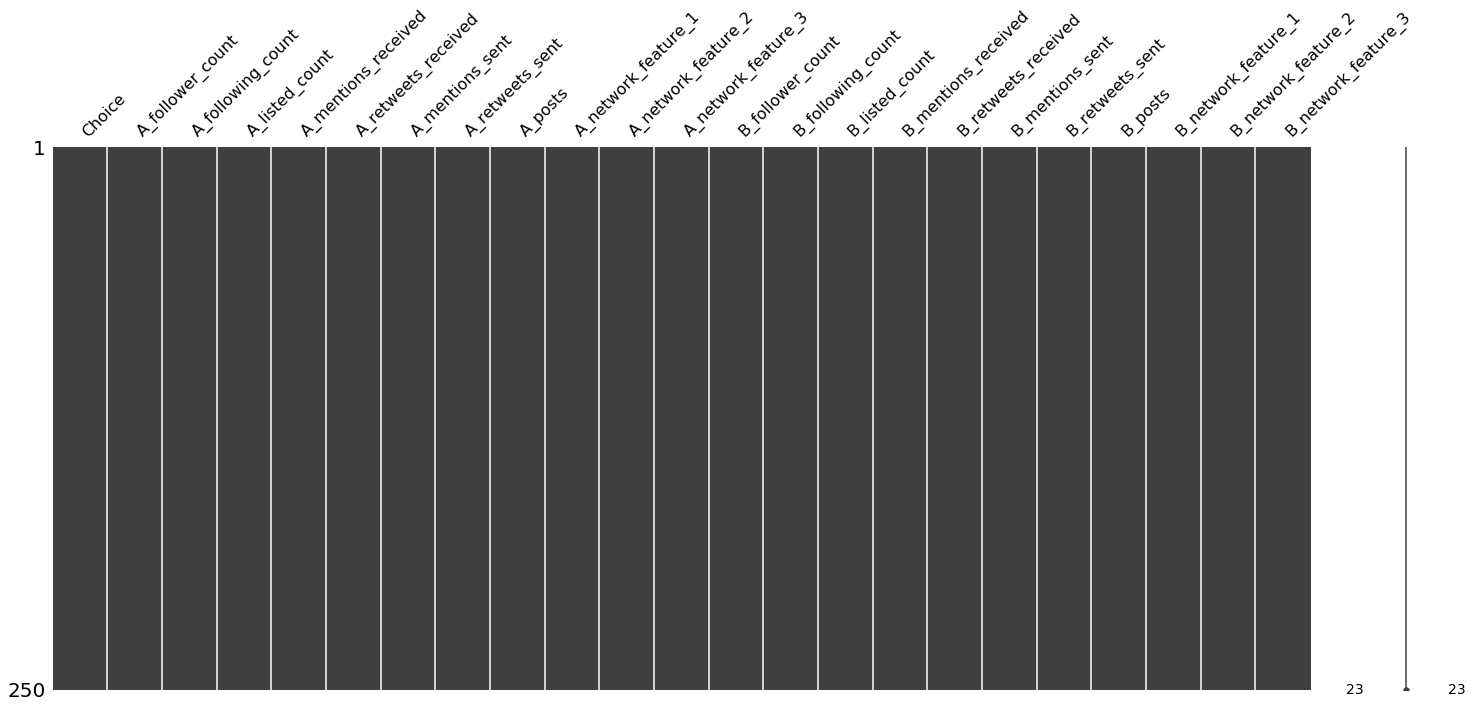

In [0]:
import missingno as msno
print ("Missing Value Map")
msno.matrix(data.sample(250))

In the density diagram, there are no missing values and all the variables have complete information, so, we don't need a data imputation over the train data set.

<a id='FeatureSelection'></a>
### 2.6 Feature Selection

How to find the most valuable features is very important to some particular dataset. These dataset might have thousands of features, most of which could be trivial. If we use all features to train, it might consume lots of time and increase overfitting. 

So feature selection is very important for machine learning. Good feature selection can improve the performance of the model and help us understand the characteristics and underlying structure of the data, which plays an important role in further improving the model and algorithm. By the feature selection, we can reduce the number of features and dimensionality to make the model more generalizable and enhance the understanding between features and eigenvalues.




    The following function performs a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.

See [this link](https://en.wikipedia.org/wiki/Stepwise_regression) for the details.

In [0]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import model_selection 

data = pd.read_csv("./train.csv")

dataSize = data.shape[0]

percentage = 0.30 

xTrain,xTest,yTrain,yTest = model_selection.train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=percentage,random_state=22)

X = xTrain
y = yTrain

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('\n resulting the top important features: \n')

print(result)

The dataset has :  5500  entries.
Add  B_listed_count                 with p-value 4.06978e-33
Add  A_listed_count                 with p-value 4.47078e-31
Add  A_mentions_received            with p-value 7.7054e-16
Add  B_retweets_sent                with p-value 1.639e-16
Add  A_mentions_sent                with p-value 3.69445e-14
Add  A_network_feature_1            with p-value 4.90116e-12
Add  A_network_feature_3            with p-value 1.38601e-12
Add  B_network_feature_3            with p-value 2.86458e-08
Add  B_retweets_received            with p-value 4.27184e-05
Add  B_network_feature_1            with p-value 1.39233e-10
Add  B_follower_count               with p-value 1.66872e-07
Add  A_follower_count               with p-value 0.000148333
Add  B_mentions_sent                with p-value 0.000134803
Add  A_retweets_sent                with p-value 0.00842339

 resulting the top important features: 

['B_listed_count', 'A_listed_count', 'A_mentions_received', 'B_retweets_se

<a id='TrainingModels'></a>
# 3 Training Models

There are total of 11 attributes or parameters on the basis of which we decide the most influential person. Data is divided such that each attribute is divided into two sub-categories A and B. We will pre-process the data by subtracting the two sub-categories for each attribute.

<a id='SplitData'></a>
### 3.1 Split Data



Since we want to access the best performance of our chosen classifiers, instead of reporting the best-case results. Although we already have a test data file, we still need to split our training data into train/test data set in the optimization stage, and adjust the parameters of classifiers according to their performance on the test data. Because performance estimates should always be done on completely independent data

The dataset has :  5500  entries.


Text(0,0.5,'')

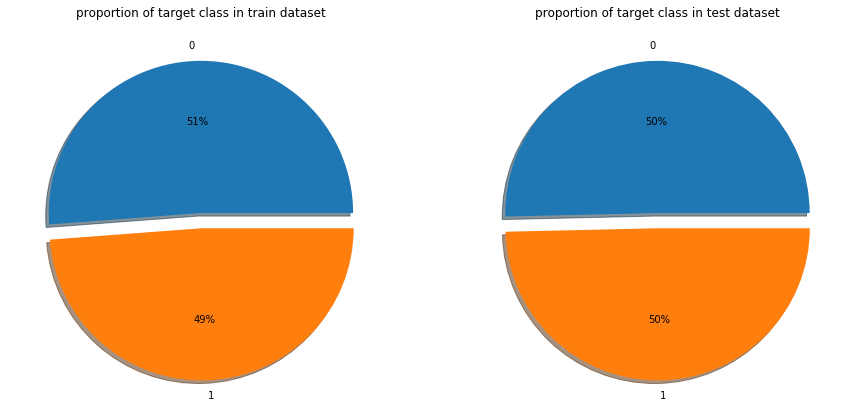

In [22]:
from sklearn import model_selection 

dataSize = data.shape[0]
print("The dataset has : ",dataSize," entries.")

percentage = 0.30 

xTrain,xTest,yTrain,yTest = model_selection.train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=percentage,random_state=22)

plt.figure(figsize=(15,7))
plt.subplot(121)
yTrain.value_counts().plot.pie(labels = ["0","1"],autopct = "%1.0f%%",shadow = True,explode=[0,.1])
plt.title("proportion of target class in train dataset")
plt.ylabel("")
plt.subplot(122)
yTest.value_counts().plot.pie(labels = ["0","1"],autopct = "%1.0f%%",shadow = True,explode=[0,.1])
plt.title("proportion of target class in test dataset")
plt.ylabel("")

This shows the fairness of the separation of our traning data.

<a id='TrainingModelFunction'></a>
### 3.2 Training Model Function

Since we want to optimize several different classifiers, we built a ***model*** function to avoid duplicated code

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score

def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y):
    
    # Training the algorithm.    
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\n Accuracy Score :",accuracy_score(dtest_y,predictions))
    print ("\n Classification Report : \n \n",(classification_report(dtest_y,predictions)))
    
    ################# Draw Results graph ######################## 
     
    # draw ROC Curve. 
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.figure(figsize=(12,12))
    plt.subplot(222)  
    plt.plot(fpr,tpr,label = ("Area_under the curve :",round(auc(fpr,tpr),3)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC Curve",fontsize=18,fontweight="bold")
        

    ######## Cross Validation Analysis. ##################### 
    
    # Merge X_train and X_test.
    xTotal= np.concatenate((dtrain_x,dtest_x),axis=0)
    
    # Merge y_train and y_test. 
    yTotal= np.concatenate((dtrain_y,dtest_y),axis=0)
    
    k=10  # Scoring with Accuracy.
    scoresAccuracy=cross_val_score(algorithm,xTotal,yTotal,cv=k)
    print("Accuracy: %0.3f (+/- %0.3f)" % (scoresAccuracy.mean(), scoresAccuracy.std() * 2))
    
    k=10  # Scoring with AUC.
    scoresAUC=cross_val_score(algorithm,xTotal,yTotal,cv=k,scoring='roc_auc')
    print("Accuracy: %0.3f (+/- %0.3f)" % (scoresAUC.mean(), scoresAUC.std() * 2))
    
    ################## Validation over real test set ####################### 
    
    # Importing validation(test) set   
    
    validation_data = pd.read_csv("./test.csv",sep=",")  
    predicting_probabilites = algorithm.predict_proba(validation_data)
    predictClass=pd.DataFrame(predicting_probabilites[:,0])  
    predictClass.index=np.arange(1,len(predictClass)+1)     
    
    # Write the result to csv file
    fileName=str(algorithm)[:3]+'_predictions.csv'
    printFile= open(fileName,'w+')
    predictClass.to_csv(fileName,index=True,header=['Choice'],index_label='id')   
    printFile.close()   



<a id='RandomForestClassifier'></a>
### 3.3 Random Forest Classifier

In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=16,
            oob_score=True, random_state=27, verbose=0, warm_start=False)

 Accuracy Score : 0.7727272727272727

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.79      0.74      0.76       819
          1       0.76      0.81      0.78       831

avg / total       0.77      0.77      0.77      1650

Accuracy: 0.772 (+/- 0.022)
Accuracy: 0.861 (+/- 0.019)


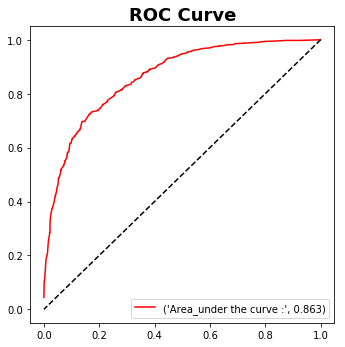

In [24]:
# Random Forest Classifier. 

from sklearn.ensemble import RandomForestClassifier

algo = RandomForestClassifier(n_jobs=16,n_estimators=80, min_samples_split=2, random_state=27, oob_score=True, criterion='entropy')

# Call model function to train algorithm.

model(algo,xTrain,yTrain,xTest,yTest)

<a id='DecisionTreeClassifier'></a>
### 3.4 Decision Tree Classifier

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In most cases, the deeper the tree, the more complex the decision rules and the fitter the model.


Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
* Able to handle multi-output problems.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.





DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=27,
            splitter='best')

 Accuracy Score : 0.7460606060606061

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.75      0.73      0.74       819
          1       0.74      0.76      0.75       831

avg / total       0.75      0.75      0.75      1650

Accuracy: 0.751 (+/- 0.039)
Accuracy: 0.837 (+/- 0.026)


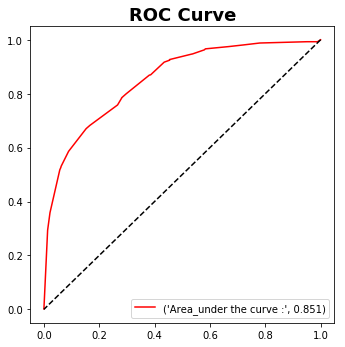

In [25]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

algo = DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=27)

# Call model function to train algorithm.

model(algo,xTrain,yTrain,xTest,yTest)

<a id='LogisticRegression'></a>
### 3.5 Logistic Regression

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

[LibLinear]LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=50,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=27,
          solver='liblinear', tol=0.0001, verbose=1, warm_start=False)

 Accuracy Score : 0.7357575757575757

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.74      0.73      0.73       819
          1       0.73      0.74      0.74       831

avg / total       0.74      0.74      0.74      1650

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Accuracy: 0.734 (+/- 0.049)
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Accuracy: 0.799 (+/- 0.056)


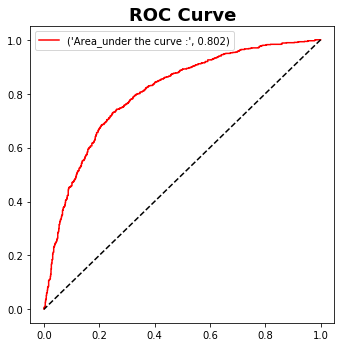

In [26]:
# Logistic Classifier. 
from sklearn.linear_model import LogisticRegression

algo = LogisticRegression(penalty='l1',class_weight='balanced', random_state=27, verbose = 1, max_iter = 50)

# Call model function to train algorithm.

model(algo,xTrain,yTrain,xTest,yTest)

<a id='NaiveBayesClassifier'></a>
### 3.6 Naive Bayes Classifier

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(X_i | y)$ .

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. 

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.


GaussianNB(priors=None)

 Accuracy Score : 0.5448484848484848

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.70      0.15      0.24       819
          1       0.53      0.94      0.67       831

avg / total       0.61      0.54      0.46      1650

Accuracy: 0.550 (+/- 0.021)
Accuracy: 0.710 (+/- 0.065)


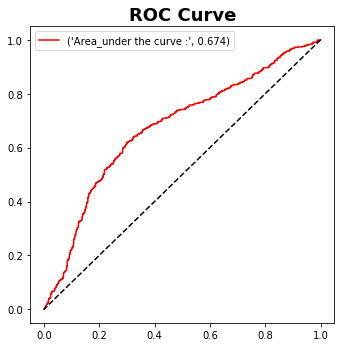

In [27]:
# Naive Bayes Classifier. 

from sklearn.naive_bayes import GaussianNB

# Parameter is the number of neighbors. 

algo = GaussianNB()

# Call model function to train algorithm.

model(algo,xTrain,yTrain,xTest,yTest)

<a id='Assemblymethods'></a>
### 3.7 Assembly methods
Assembly methods use multiple classifiers to obtain better predictive performance than could be obtained from any of the constituent classifier alone. We use two assembly method here. Voting method and Stacking method.


<a id='VotingClassifier'></a>
#### 3.7.1 Voting Classifier
The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.

In majority voting (hard voting), the predicted class label for a particular sample is the class label that represents the majority (mode) of the class labels predicted by each individual classifier.

In contrast to majority voting (hard voting), soft voting returns the class label as argmax of the sum of predicted probabilities.Specific weights can be assigned to each classifier via the weights parameter. When weights are provided, the predicted class probabilities for each classifier are collected, multiplied by the classifier weight, and averaged. The final class label is then derived from the class label with the highest average probability.

We used soft voting method here.

[LibLinear]VotingClassifier(estimators=[('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            mi...    solver='liblinear', tol=0.0001, verbose=1, warm_start=False)), ('gnb', GaussianNB(priors=None))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

 Accuracy Score : 0.7424242424242424

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.86      0.58      0.69       819
          1       0.68      0.90      0.78       831

avg / total       0.77      0.74      0.74      1650

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Accuracy: 0.743 (+/- 0.036)
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLine

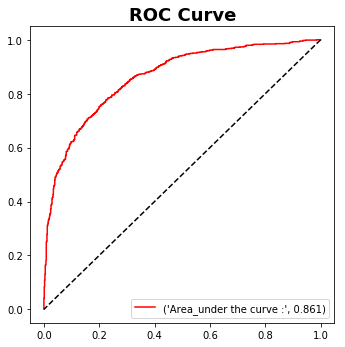

In [28]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(n_jobs=16,n_estimators=80, min_samples_split=2, random_state=27, oob_score=True, criterion='entropy')
dt = DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=27)
lr = LogisticRegression(penalty='l1',class_weight='balanced', random_state=27, verbose = 1, max_iter = 50)
gn = GaussianNB()


eclf1 = VotingClassifier(estimators=[('rfc',rf),('dtc',dt),('lrf',lr),('gnb',gn)],
                         voting ='soft')

model(eclf1,xTrain,yTrain,xTest,yTest)

<a id='StackingClassifier'></a>
#### 3.7.2 Stacking Classifier
Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier. The individual classification models are trained based on the complete training set; then, the meta-classifier is fitted based on the outputs -- meta-features -- of the individual classification models in the ensemble. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.

[LibLinear][LibLinear]StackingClassifier(average_probas=False,
          classifiers=[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weigh...ion_leaf=0.0, presort=False, random_state=27,
            splitter='best'), GaussianNB(priors=None)],
          meta_classifier=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=50,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=27,
          solver='liblinear', tol=0.0001, verbose=1, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)

 Accuracy Score : 0.7727272727272727

 Classification Report : 
 
              precision    r

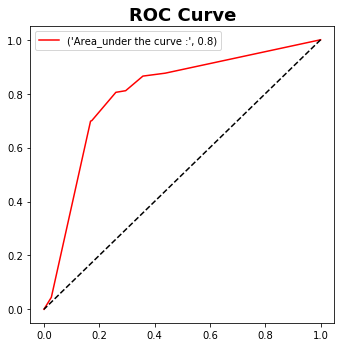

In [29]:
#!pip install mlxtend
from mlxtend.classifier import StackingClassifier

sclf = StackingClassifier(classifiers=[rf,lr,dt,gn], meta_classifier=lr)

model(sclf,xTrain,yTrain,xTest,yTest)

<a id='EvaluationandComparison'></a>
# 4 Evaluation and Comparison


                                                      Evaluation
                                                    
We have done evaluation of data analysis using 4 distinct models that are Random Forest, Decisison Trees, Logistic Regression and Naive Bayes classifier. Talking about our data, our data is binary classification predicting who is more popular- Person A or Person B in each given test instance. There are 11 Attributes for each class (A and B) which are independent of each other. 

                                            Difference between AUC and Accuracy:-
                                            
There is difference between accuracy and AUC is that, accuracy varies with the threshold. We change the threshold depending on  the circumstances, for instance, the regression on medical data which is allowing to predict the chances of disease from the sympptoms chooses lower threshold which increases the senstivity of the analysis. On the other hand, AUC does not depend on threshold. It does not varies. In fact, AUC can be determined by integrating accuracy conisedring all values of threshold from 0 to 1. So, we conclude from this discussion that AUC is the correct measure to evaluate the overall performance of the model. 
                                           
                                            
1. Random Forest

Random Forest is known to be the best classifier for performing discrete classification. It is known to exclude overfitting issues due to its model fitting of various randomly split data. As the number of trees in random forest increases, the algorithm becomes more reliable and there are minimal chances of overfitting but it comes with the cost of time consumption. 
For this data, the value of n_estimators (decides the number of trees in the forest) is carefully set to 80 which gives the AUC to be equal to 86.3% and remains constant after we increase the value of n_estimators.

2. Decision Trees

After Random Forest, Decision tree is sufficiently good model for classification for both continuous and categorical attributes. The only problm with decision trees is that it is more prone to produce over-fitted results than any other model. Therefore, tuning of the hyperparameters in the decision tree does not comes as easy as random forest. That is why, we have chosen to set the parameter 'max_depth' which decides how deep can a tree go equals to 5, if we try to double that is 10, its AUC declines by 10% which is symbol of model overfitting taking place. By hit and trial, Max_depth = 5 is the perfect parameter which gives the AUC of 85%. Moreover, its measuring criterion is changed to 'gini which improved the efficiency than observed from 'entropy'.

3. Logistic Regression

Logistic Regression is one of the most sought after classifying model which is eminent for performing regression techniques on binary categorical classifiaction on contrary to linear regression. logistic regression hs the reputation to erform well on the data that is having low signal to noise ratio, which includes the data that is either highly unpredictable or very small in size which makes it quite difficult to wxtrax=ct out the right information.
Also, Logistic regression classifier package comes with the hyperparameter 'penalty' which can be lasso('l1') or ridge('l2'). In this case, we have considered 'l1' regularizattion which increases the efficiency. As in this data, as seen from the data comparison part, where we need to regularize and do feature selecton, l1 is important as only few of the attributes are very distinct or probably have outliers.
The AUC  result of Logistic Regression is comparably good which is 80.2%.

4. Naive Bayes Classifier 

Naive bayes classifier is very famous text classifier. In the scikit learn library, naive bayes doesnot plainly depends on any hyperparameters to function on. so, the results obtained from Naive bayes classifier are very robust and straighforward. In this data, As we can see, The naive bayes classifier is not very successful which generates the 
AUC of 67.4% which is not considered very efficient and even lesser accuracy score (54%) which is equivalant to random guessing.

Note on Naive Bayes Poor performance:-

We were surprised to see the least accuracy produced by Naive Bayes Classifier. The reasons for that can be :-

1.It is assumed that the algorithm considers that the atttributes are independent from each other which is not true              pragmatically. In this data, some attributes seems to depend on others but some does not, that is where the algorthm's performance decreased.

2.The algorithm also functions badly when the number of instances are relatively large, that is where tree algorithms helps. 
  
On Conclusion Stage, considering the above discussion Random Forest algorithm is the winner but decision trees can also be considered if we carefully design the its hyperparameters. But, Using Naive Bayes Classification in this Data Analysis will be considered  a bad idea.  Although, Naive Bayes is considered the best algorithm in sentiment analysis or detecting spam emails. But in this dataset, it worked poorly than expected.

                                                     